In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.special import comb
import matplotlib.pyplot as plt

In [2]:
# sns.set_context("talk")

# what we need
- plot should have horizontal line -- this is the # of cells we want to barcode i.e. # of unique barcodes we need to hit

In [3]:
def vary(n,k):
    return comb(n, k, repetition=False)

In [4]:
def make_combinatorics(n = range(0,200,1), k = range(3, 20)):
    ks = k
    # ks = [3]

    dfs = []
    for k in ks:
        df = pd.DataFrame(data = {'n':n})
        df['k'] = k
        df['num_unique'] = df['n'].apply(lambda n : vary(n, k))
        dfs.append(df)
    df = pd.concat(dfs)
    return df.reset_index()
# df.head()

In [5]:
threshold = 1e6

In [6]:
# df = make_combinatorics(n=range(1,40,1), k = range(1,20,1))

In [7]:
# ax = sns.lineplot(x='n', y='num_unique', data=df, hue ="k")
# ax.set_yscale('log')
# ax.axhline(1e6)

# varying N with constrained K

In [8]:
df = make_combinatorics(n=range(1,40,1), k = range(1,20,1))

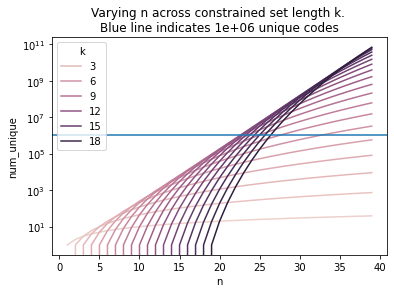

In [9]:
ax = sns.lineplot(data = df, x = 'n', y = 'num_unique', hue = "k")
ax.set_yscale('log')
ax.axhline(threshold)
ax = ax.set_title(f"Varying n across constrained set length k. \
\nBlue line indicates {threshold:.2} unique codes")

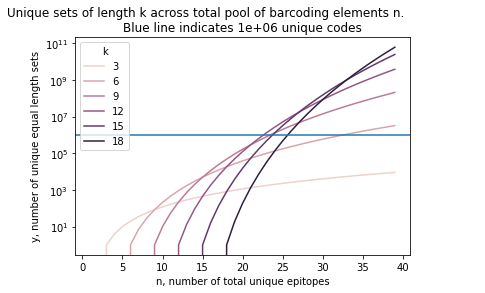

In [10]:
select = range(0, df['k'].max(), 3)
df_ = df[df['k'].isin(select)]
ax = sns.lineplot(data = df_, x = 'n', y = 'num_unique', hue = "k")
ax.set_yscale('log')
ax.axhline(threshold)
ax.set_xlabel("n, number of total unique epitopes")
ax.set_ylabel("y, number of unique equal length sets")
ax = ax.set_title(f"Unique sets of length k across total pool of barcoding elements n. \
                  \nBlue line indicates {threshold:.2} unique codes")

In [39]:
# ax = sns.lineplot(data = df[df['solved']], x = 'n', y = 'num_unique', hue = "k")
# ax.set_yscale('log')
# ax.axhline(threshold)
# ax = ax.set_title(f"values of n choose k that solve the {threshold:.2}")

# varying K with constrained N

In [40]:
df = make_combinatorics(n=range(0,40,1), k = range(0,40,1))
df = df.reset_index()

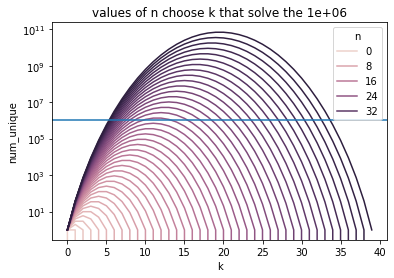

In [41]:
ax = sns.lineplot(data = df, x = 'k', y = 'num_unique', hue = "n")
ax.set_yscale('log')
ax.axhline(threshold)
ax = ax.set_title(f"values of n choose k that solve the {threshold:.2}")

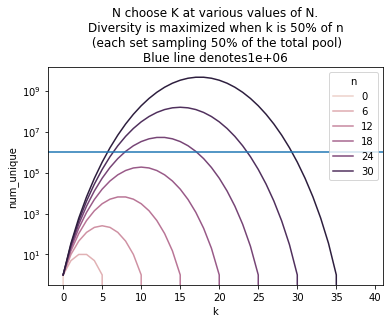

In [42]:
select = range(0, 40, 5)

ax = sns.lineplot(data = df[df['n'].isin(select)], x = 'k', y = 'num_unique', hue = "n")
ax.set_yscale('log')
ax.axhline(threshold)
ax = ax.set_title(f"N choose K at various values of N.\n\
Diversity is maximized when k is 50% of n\n \
(each set sampling 50% of the total pool)\n\
Blue line denotes{threshold:.2}")

In [11]:
# in analysis, if set length isn't controlled we _can_ deal with that, but introduces concept of dropout

# shuffled assembly of tag sets, based on synthesis constraints

In [14]:
df = make_combinatorics(n=range(1,40,1), k = range(3,9,1))
df['shuffle_ct'] = df['num_unique']**2
df['shuffle_assemblyCt'] = df['n']*2
df['assembly_solved'] = df['shuffle_ct'].apply(lambda x : x>threshold)
df['solved'] = df['num_unique'].apply(lambda x : x>threshold)

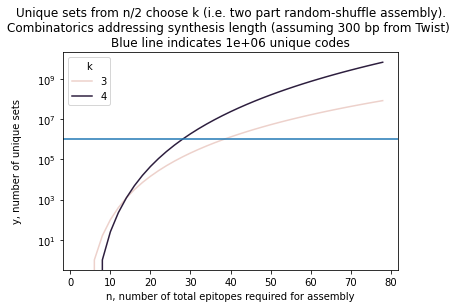

In [15]:
_df = df[df['k'].isin([3,4])]
ax = sns.lineplot(data = _df, y = 'shuffle_ct', x = 'shuffle_assemblyCt', hue = "k")
ax.set_yscale('log')
ax.axhline(threshold)
ax.set_xlabel("n, number of total epitopes required for assembly")
ax.set_ylabel("y, number of unique sets\n")

title = f"Unique sets from n/2 choose k (i.e. two part random-shuffle assembly).\n\
Combinatorics addressing synthesis length (assuming 300 bp from Twist) \
\nBlue line indicates {threshold:.2} unique codes"

ax = ax.set_title(title)

In [ ]:
select = range(0, 21, 3)
select_df = df[df['k'].isin(select)]

# last bit
cp fp math -- where set is 9

In [23]:
df = make_combinatorics(n=range(1,40,1), k = range(3,16,1))
df['shuffle_ct'] = df['num_unique']**3
df['shuffle_assemblyCt'] = df['n']*3
df['assembly_solved'] = df['shuffle_ct'].apply(lambda x : x>threshold)
df['solved'] = df['num_unique'].apply(lambda x : x>threshold)

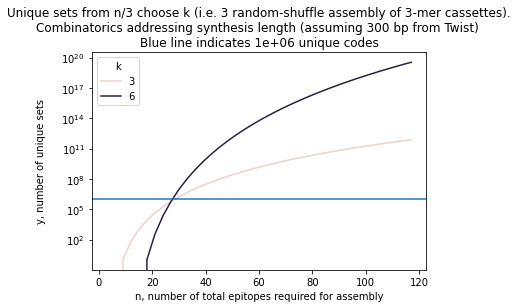

In [31]:
_df = df[df['k'].isin(range(3, 9, 3))]
ax = sns.lineplot(data = _df, y = 'shuffle_ct', x = 'shuffle_assemblyCt', hue = "k")
ax.set_yscale('log')
ax.axhline(threshold)
ax.set_xlabel("n, number of total epitopes required for assembly")
ax.set_ylabel("y, number of unique sets\n")

title = f"Unique sets from n/3 choose k (i.e. 3 random-shuffle assembly of 3-mer cassettes).\n\
Combinatorics addressing synthesis length (assuming 300 bp from Twist) \
\nBlue line indicates {threshold:.2} unique codes"

ax = ax.set_title(title)

In [ ]:
min_df = df[df['solved']].groupby("n").min().reset_index()

In [ ]:
df[df['assembly_solved']].groupby("n").min()

In [ ]:
min_df.sort_values('n')

In [ ]:
ax = sns.relplot(x='k', y='n', data=min_df)
# ax.set_title(f"minimum nCk combo\nthat crosses {threshold:e} threshold")

In [ ]:
# min_df = df[df['solved it! assembly']].groupby('epitope_ct_needed').min().reset_index()

In [ ]:
min_df = df[df['solved it! assembly']].groupby().min().reset_index()

In [ ]:
min_df.sort_values("epitope_ct_needed")

In [ ]:
ax = sns.scatterplot(x='k', y='epitope_ct_needed', data=min_df)
ax.set_title(f"minimum # of a n/k combo that crosses {threshold} threshold")

In [ ]:
threshold = 1e6
df['solved it!'] = df['count'].apply(lambda x : x>threshold)

In [ ]:
min_df = df[df['solved it!']].groupby('k').min().sort_values('k').reset_index()
min_df

# when does [x choose 3]^2 cross threshold

In [ ]:
ax = sns.scatterplot(x='n', y='k', data=min_df)
ax.set_title(f"minimum nCk combo\nthat crosses {threshold:e} threshold")

In [ ]:
ax = sns.lineplot(x='n', y='count', hue='k', data=df)
ax.set_yscale('log')
ax.axhline(1e6)

In [ ]:
df = pd.DataFrame(data = {'num':range(0,30,1)})

In [ ]:
# def set_k(df, k):
#     df['unique_codes'] = df['n_pool-size'].apply(lambda x: apply_vary(x,k))
# #     df['k'] = k
#     return df

In [ ]:
# def hold_k(df, k, apply_col, output_column):
#     df[f'{output_column}-varyN'] = df[apply_col].apply(lambda x: vary(x,k))
#     df['k'] = k
#     return df

def hold_k(df, k, apply_col, output_column):
    df_ = df.copy()
    df_[f'{output_column}-{apply_col}choose-{k}'] = df_[{apply_col}].apply(lambda x: vary(x,k))
#     df['n'] = n
    return df_

In [ ]:
def hold_n(df,
           n,
           apply_col,
           output_column):
    df_ = df.copy()
    df_[f'{output_column}-{n}choose-{apply_col}'] = df_[{apply_col}].apply(lambda x: vary(n,x))
#     df['n'] = n
    return df_

In [ ]:
# hold_k(df, 20, 'num', 'uniqueIf')
df = hold_n(df, 30, 'num', 'uniqueIf')
# df = hold_n(df, 60, 'num', 'uniqueIf')
# df = hold_n(df, 90, 'num', 'uniqueIf')

# set_k(df,5, 'num', 'uniqueCodes')

In [ ]:
df.columns

In [ ]:
ax = sns.lineplot(data = df, x = 'num', y = 'uniqueIf-30choose-num')
ax.set

In [ ]:
sns.lineplot(data = df, x = 'num', y = 'uniqueCodes-varyK').set_title("n held at 5, k on x axis")

In [ ]:
# target_unique =  70*10^6*.01
target_unique = 100000
g = sns.lineplot(data=vary_k,
           x = 'set_length',
           y = 'unique_codes')
g.axhline(target_unique)
g.set_title("# unique barcodes as a function of changing k, \nthe # of elements in each set, \nfrom a pool of 20 elements")
plt.show()

## when the element count is held steady, we 
# 1% of mouse neurons is 70 * 10^6 & *.01

In [ ]:
# def varyK(n, k):
    result = []
    for num in range(0,k+1,1):
        diversity = comb(n, num, repetition=False)
        result.append(diversity)
    return result

In [ ]:
# def varyN(n, k):
    result = []
    for num in range(0,n+1,1):
        diversity = comb(num, k, repetition=False)
        result.append(diversity)
    return result

In [ ]:
#to get column names as arguments, something like this 
# df[list(f.__code__.co_varnames)].apply((lambda row: f(**row)), axis=1)

In [ ]:
# def set_n(df, n):
#     df['unique_codes'] = df['set_length'].apply(lambda x: apply_vary(n,x))
#     df['n'] = n
#     return df

In [ ]:
df = pd.DataFrame(data = {'n_pool-size':range(0,40,1)})

In [ ]:
def set_k(df, k):
    df['unique_codes'] = df['n_pool-size'].apply(lambda x: apply_vary(x,k))
    df['k'] = k
    return df

In [ ]:
vary_k = set_k(df,)

In [ ]:
# target_unique =  70*10^6*.01
target_unique = 70000
g = sns.relplot(data=test,
           x = 'n_pool-size',
           y = 'unique_codes')
g.set_ylim([0, 10**6])
# .set(title = "Barcode count - element length 3, variable n")
## when the element count is held steady, we 
# 1% of mouse neurons is 70 * 10^6 & *.01

In [ ]:
70000

In [ ]:
def set_k(df, k):
    df['unique_codes'] = df['n_pool-size'].apply(lambda x: apply_vary(x,
                                                                  k))
    df['k_elements-in-array'] = k
    return df
#          args = (df['n_pool-size'], df["k_elements-in-array"]))

In [ ]:
set_k(df, 3)

In [ ]:
k = varyN(9,3)

In [ ]:
pd.DataFrame({'unique_barcode_ct': varyN(9,3)})